#### Imports

In [53]:
import os
import numpy             as np
import pandas            as pd
import tables            as tb
import matplotlib.pyplot as plt

from   invisible_cities.icaro.hst_functions  import hist2d

%matplotlib inline

import invisible_cities.core .fit_functions  as     fitf
from   invisible_cities.core .core_functions import in_range

from   invisible_cities.icaro.hst_functions  import shift_to_bin_centers
from   invisible_cities.reco                 import tbl_functions as tbl

In [16]:
eventsPath = '/data5/users/carmenromo/PETALO/full-body-PET/4cm_depth/data_r_map/compton/'
true_r1_th2 , true_r1_th4  = [], []
true_r2_th2 , true_r2_th4  = [], []
var_phi1_th2, var_phi1_th4 = [], []
var_phi2_th2, var_phi2_th4 = [], []

for filename in os.listdir(eventsPath):
    if filename.endswith('2.npz'):
        my_file   = eventsPath+filename
        d = np.load(my_file)
        try:
            for i in d['a_true_r1']:
                true_r1_th2 .append(i)
            for i in d['a_true_r2']:
                true_r2_th2 .append(i)
            for i in d['a_var_phi1']:
                var_phi1_th2.append(i)
            for i in d['a_var_phi2']:
                var_phi2_th2.append(i)
        except:
            continue
    elif filename.endswith('4.npz'):
        my_file   = eventsPath+filename
        d = np.load(my_file)
        try:
            for i in d['a_true_r1']:
                true_r1_th4 .append(i)
            for i in d['a_true_r2']:
                true_r2_th4 .append(i)
            for i in d['a_var_phi1']:
                var_phi1_th4.append(i)
            for i in d['a_var_phi2']:
                var_phi2_th4.append(i)
        except:
            continue

sel1_th2 = (np.array(true_r1_th2) < 1000) 
sel2_th2 = (np.array(true_r2_th2) < 1000)
true_r1_th2    = np.array(true_r1_th2 )[sel1_th2]
true_r2_th2    = np.array(true_r2_th2 )[sel2_th2]
var_phi1_th2   = np.array(var_phi1_th2)[sel1_th2]
var_phi2_th2   = np.array(var_phi2_th2)[sel2_th2]
sigma_phi1_th2 = np.sqrt (var_phi1_th2)
sigma_phi2_th2 = np.sqrt (var_phi2_th2)

sel1_th4 = (np.array(true_r1_th4) < 1000) 
sel2_th4 = (np.array(true_r2_th4) < 1000)
true_r1_th4    = np.array(true_r1_th4 )[sel1_th4]
true_r2_th4    = np.array(true_r2_th4 )[sel2_th4]
var_phi1_th4   = np.array(var_phi1_th4)[sel1_th4]
var_phi2_th4   = np.array(var_phi2_th4)[sel2_th4]
sigma_phi1_th4 = np.sqrt (var_phi1_th4)
sigma_phi2_th4 = np.sqrt (var_phi2_th4)

In [19]:
radius_th2    = np.concatenate((   true_r1_th2,    true_r2_th2), axis=None) 
var_phi_th2   = np.concatenate((  var_phi1_th2,   var_phi2_th2), axis=None) 
sigma_phi_th2 = np.concatenate((sigma_phi1_th2, sigma_phi2_th2), axis=None) 

radius_th4    = np.concatenate((   true_r1_th4,    true_r2_th4), axis=None) 
var_phi_th4   = np.concatenate((  var_phi1_th4,   var_phi2_th4), axis=None) 
sigma_phi_th4 = np.concatenate((sigma_phi1_th4, sigma_phi2_th4), axis=None) 

In [17]:
print(len(true_r1_th2), len(true_r2_th2))
print(max(true_r1_th2), min(true_r2_th2))
print(max(sigma_phi1_th2), max(sigma_phi2_th2))
print('')
print(len(true_r1_th4), len(true_r2_th4))
print(max(true_r1_th4), min(true_r2_th4))
print(max(sigma_phi1_th4), max(sigma_phi2_th4))

61353 61350
419.95944130530745 380.0491718507132
2.10759829124137 1.8572829453776936

60645 60644
419.95944130530745 380.0491718507132
0.6258265245163689 0.06537272567588297


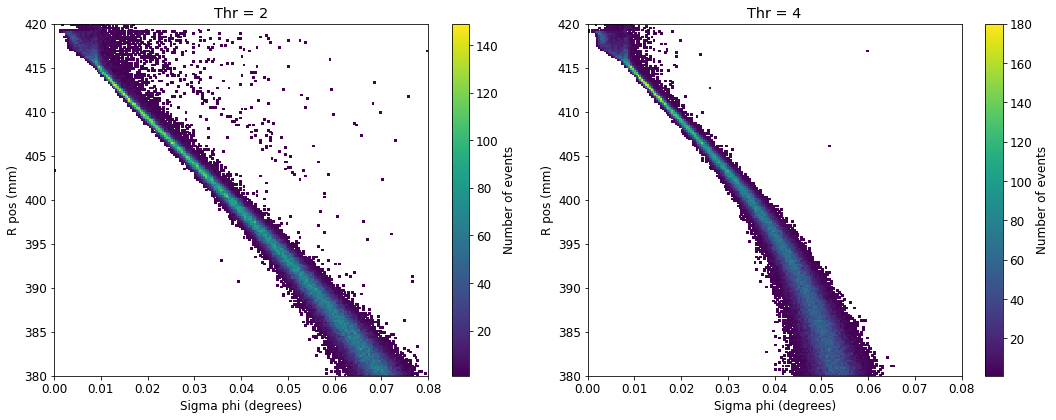

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
plt.rcParams["font.size"] = 12

ranges = (0., 0.08), (380., 420.)
bins = 200

h1 = ax1.hist2d(sigma_phi_th2, radius_th2, bins=(bins, bins), range=ranges, cmin=1)
h2 = ax2.hist2d(sigma_phi_th4, radius_th4, bins=(bins, bins), range=ranges, cmin=1)

ax1.set_xlabel('Sigma phi (degrees)')
ax1.set_ylabel('R pos (mm)'         )
ax1.set_title('Thr = 2')

ax2.set_xlabel('Sigma phi (degrees)')
ax2.set_ylabel('R pos (mm)'         )
ax2.set_title('Thr = 4')

cbar1 = plt.colorbar(h1[3], ax=ax1)
cbar1.set_label('Number of events')
cbar2 = plt.colorbar(h2[3], ax=ax2)
cbar2.set_label('Number of events')

plt.tight_layout()
plt.xticks(fontsize=12);

## Threshold = 2

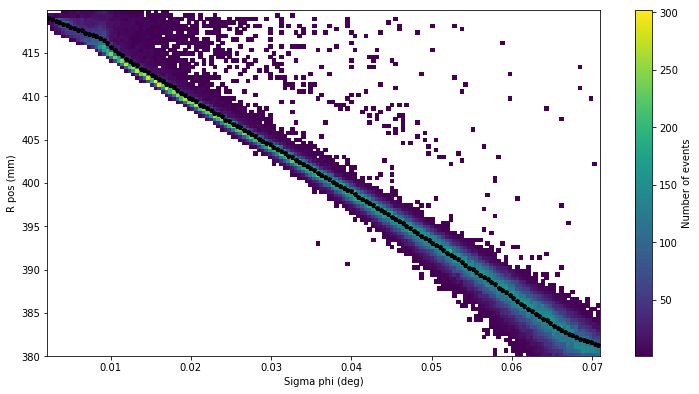

In [33]:
radlim  = 380., 420.
siglim  = 0.002, 0.071

sel  = in_range(radius_th2, *radlim) & in_range(sigma_phi_th2, *siglim)
s, r = sigma_phi_th2[sel], radius_th2[sel]

frame_data = plt.gcf().add_axes((.1, .3,
                                 .8, .6))
Rbins = 100
Sbins = 150

fig = plt.figure(1)
fig.set_figwidth(12.)
fig.set_figheight(8.)
plt.hist2d(s, r, (Sbins, Rbins), cmin=1)

x, y, yu = fitf.profileX(s, r, Sbins, siglim, drop_nan=False)
plt.errorbar(x, y, yu, np.diff(x)[0]/2, fmt="kp", ms=5, lw=2)
plt.xlabel('Sigma phi (deg)')
plt.ylabel('R pos (mm)')
plt.colorbar().set_label("Number of events")
#plt.savefig('radial_ratio_thr2pes.pdf')

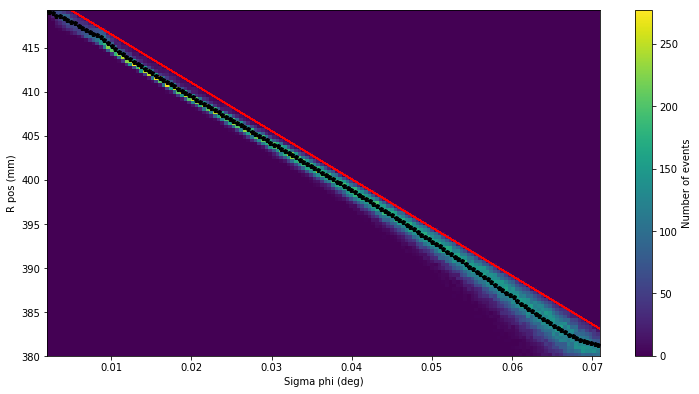

In [44]:
x1 = 0.002
x2 = 0.075
y1 = 420
y2 = 380
m0 = (y2 - y1)/(x2 - x1)
liney1 = m0 * sigma_phi_th2 + 422

frame_data = plt.gcf().add_axes((.1, .3, .8, .6))
Rbins = 100
Sbins = 150

sel   = in_range(radius_th2, *radlim) & in_range(sigma_phi_th2, *siglim)
lines = radius_th2 < liney1
s, r  = sigma_phi_th2[sel & lines], radius_th2[sel & lines]

fig = plt.figure(1)
fig.set_figwidth(12.)
fig.set_figheight(8.)

plt.hist2d(s, r, (Sbins, Rbins))
plt.plot(sigma_phi_th2[sel], liney1[sel], color='red', linestyle='--', linewidth=1)

x, y, yu = fitf.profileX(s, r, Sbins, siglim, drop_nan=False)
plt.errorbar(x, y, yu, np.diff(x)[0]/2, fmt="kp", ms=5, lw=2)
plt.xlim(siglim)
plt.xlabel('Sigma phi (deg)')
plt.ylabel('R pos (mm)')
plt.colorbar().set_label("Number of events")
#plt.savefig('radial_ratio_thr3pes_test.pdf')

## Table:

In [48]:
sigmanBins   = [100, 150, 200, 300]
sigmaRange   = 0.002, 0.071
sigmaBins    = {n: np.linspace(*sigmaRange, n + 1) for n in sigmanBins}
sigmaCenters = {n: shift_to_bin_centers(bins) for n, bins in sigmaBins.items()}
sigmaPitch   = {n: np.diff(bins)[0] for n, bins in sigmaBins.items()}

In [49]:
## Aquí creamos los arrays que nos servirán para la tabla
R_ave   = {}
R_ave_u = {} # uncertainty

for n in sigmaBins:
    x, y, yu     = fitf.profileX(s, r, n, sigmaRange, drop_nan=False)
    R_ave  [n] = y
    R_ave_u[n] = yu

In [55]:
rpos_threshold = 2
path = '/data5/users/carmenromo/PETALO/full-body-PET/4cm_depth/'
phi_table_name = path+f"r_table_full_body_195cm_4cmdepth_thr{rpos_threshold}pes_compton.h5"

class Radii(tb.IsDescription):
    RmsPhi      = tb.Float32Col(pos=0)
    Rpos        = tb.Float32Col(pos=0)
    Uncertainty = tb.Float32Col(pos=0)

with tb.open_file(phi_table_name, "w") as output_file:
    if '/Radius' in output_file:
        Radius = output_file.root.Radius        
    else:
        Radius = output_file.create_group(output_file.root, "Radius")
    
    for n in sigmaBins:
        pitch      = sigmaPitch[n]
        table_name = f"f{rpos_threshold}pes{n}bins"

        r_table = output_file.create_table(Radius, table_name,
                                           description = Radii,
                                           title       = "radial_pos",
                                           filters     = tbl.filters('ZLIB4'))
    
    
        for i, sigma in enumerate(sigmaCenters[n], start=0):
            row = r_table.row
            row["RmsPhi"]      = sigma
            row["Rpos"]        = R_ave  [n][i]
            row["Uncertainty"] = R_ave_u[n][i] * R_ave[n][i] / 100
            row.append()

        table = getattr(getattr(output_file.root, 'Radius'), table_name)
        table.attrs.sigma_bins  = n
        table.attrs.sigma_pitch = pitch